In [9]:
from Bio.PDB import *
from Bio.PDB.DSSP import DSSP
from Bio.PDB.DSSP import dssp_dict_from_pdb_file
from Bio import SeqIO

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
protid = "6909_T338-R1"


parser = PDBParser()
structure = parser.get_structure(protid, "pdb/%s.pdb"%protid)

for model in structure:
    for chain in model:
        if chain.id == 'A':
            break

In [26]:
clade = 'Int9878_431_495_R_323'

for record in SeqIO.parse('orthogroup_LRR/%s-LRR.fa'%clade, 'fasta'):
    if record.id.startswith(protid):
        print(record.id)
        LRR_start = int(record.name.split('|')[1])
        break
    

6909_T338-R1|600


In [6]:
len(chain)

614

In [27]:
# for LRRpred files
f = open("athaliana_panNLRome_lrrpred.txt", "r")
startrpred = []
endrpred = []
for line in f:
        if line.split()[0] == protid:
            startrpred.append(int(line.split()[1])-LRR_start)    
f.close()

In [34]:
# for LRRpred files
lrrpredid = 'A0A1I9LP83_id64254'
f = open("LRRPredictor/uniprot_rpp1.txt", "r")
startrpred = []
for line in f:
        if line.split()[0] == lrrpredid:
            startrpred.append(int(line.split()[1]))    
f.close()


In [37]:
protid = '7crb'

parser = PDBParser()
structure = parser.get_structure(protid, "pdb/%s.pdb"%protid)

for model in structure:
    for chain in model:
        if chain.id == 'A':
            break

In [62]:
chain.__dict__.keys()

dict_keys(['level', 'internal_coord', '_id', 'full_id', 'parent', 'child_list', 'child_dict', 'xtra'])

In [69]:
for key in list(chain.__dict__['child_dict'].keys()):
    print(key[1])

580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829


In [30]:
f = open("attr/%s_LRRpred.txt"%protid, "w")
f.write("attribute: position\n")
f.write("recipient: residues\n")
for key in list(chain.__dict__['child_dict'].keys()):
    i = key[1]
    f.write("\t" + ":" + str(i) + "\t" + str(int(i in startrpred)) + "\n")
f.close()

In [83]:
parser = PDBParser()
filepath = "pdb/AF-A0A1I9LP83-F1-model_v3.pdb"
structure = parser.get_structure("protein", filepath)

In [84]:
for model in structure:
    for chain in model:
        if chain.id == 'A':
            break

In [85]:
# for unannotated PDB files
in_sheet = []
in_sheet_translated = []
startr = []
endr = []

m = structure[0]
dssp = DSSP(m, filepath)

samesheet = False

LRR_start = 600

for key in list(dssp.keys()):
    if dssp[key][0] > LRR_start:
        if dssp[key][2] != 'E' and samesheet == True:
            samesheet = False
            endr.append(dssp[key][0] - LRR_start - 1)

        elif dssp[key][2] == 'E':
            if not samesheet:
                samesheet = True
                startr.append(dssp[key][0]-LRR_start)
            in_sheet_translated.append(dssp[key][0])
        

Xs = []
Ys = []
Zs = []

X_ca = []
Y_ca = []
Z_ca = []
with open(filepath) as pdbfile:
    for line in pdbfile:
        if line[:4] == 'ATOM':
            if line[13:15] == 'CA':
                x = float(line[31:39])
                y = float(line[39:47])
                z = float(line[47:56])

                X_ca.append(x)
                Y_ca.append(y)
                Z_ca.append(z)

                num = int(line[22:27])
                if num in [_ for _ in in_sheet_translated if _>600]:
                    Xs.append(x)
                    Ys.append(y)
                    Zs.append(z)
                
check = []
dssp_tuple = dssp_dict_from_pdb_file(filepath)
dssp_dict = dssp_tuple[0]

for key, val in dssp_dict.items():
    if val[1] == 'E':
        check.append(key[1][1])
        
print(len(check) - len(in_sheet_translated))

65


In [86]:
len(in_sheet_translated)

137

In [80]:
# for annotated PDB files
in_sheet = []
in_sheet_translated = []
startr = []
endr = []
with open(filepath) as pdbfile:
    for line in pdbfile:
        if line[:5] == 'SHEET':
            start = int(line[22:27])
            startr.append(start - 580)
            end = int(line[33:38])
            endr.append(end - 580)
            for i in range(start, end + 1):
                in_sheet.append(i)
                in_sheet_translated.append(i - 580)
                
Xs = []
Ys = []
Zs = []

X_ca = []
Y_ca = []
Z_ca = []
with open(filepath) as pdbfile:
    for line in pdbfile:
        if line[:4] == 'ATOM':
            if line[13:15] == 'CA':
                x = float(line[31:39])
                y = float(line[39:47])
                z = float(line[47:56])
                
                X_ca.append(x)
                Y_ca.append(y)
                Z_ca.append(z)
                
                num = int(line[22:27])
                if num in in_sheet:
                    Xs.append(x)
                    Ys.append(y)
                    Zs.append(z)

In [87]:
# for LRRpred files
f = open("athaliana_panNLRome_lrrpred.txt", "r")
startrpred = []
endrpred = []
for line in f:
        if line.split()[0] == "6909_T338-R1":
            startrpred.append(int(line.split()[1]) - LRR_start)
            endrpred.append(int(line.split()[1]) - LRR_start + 1)
    
f.close()

In [88]:
X = []
Xa = []
Xa_color = []
for atom in chain.get_atoms():
    if atom.id == 'CA':
        Xa.append(np.array(list(atom.get_vector())))
    X.append(np.array(list(atom.get_vector())))
X = np.array(X)
Xa = np.array(Xa[600:])

In [89]:
Xa.shape

(591, 3)

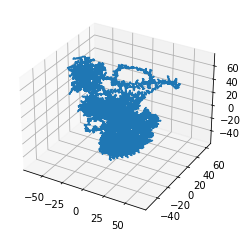

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:, 0], X[:, 1], zs = X[:, 2])

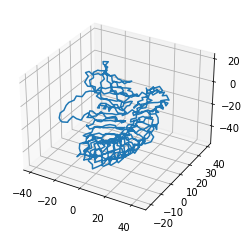

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(Xa[:, 0], Xa[:, 1], zs = Xa[:, 2])

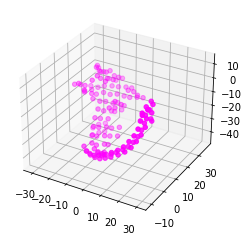

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot(Xa[:, 0], Xa[:, 1], zs = Xa[:, 2])
ax.scatter(Xs, Ys, zs = Zs, c='magenta')

In [93]:
from scipy.ndimage.filters import gaussian_filter1d as gf1d

def getCurvVectors(X, MaxOrder, sigma, loop = False, m = 'nearest'):
    """
    Get smoothed curvature vectors up to a particular order
    Parameters
    ----------
    X: ndarray(N, d)
        An N x d matrix of points in R^d
    MaxOrder: int
        The maximum order of torsion to compute (e.g. 3 for position, velocity, and curvature, and torsion)
    sigma: float
        The smoothing amount
    loop: boolean
        Whether to treat this trajectory as a topological loop (i.e. add an edge between first and last point)
    
    Returns
    -------
    Curvs: A list of (N, 3) arrays, starting with the smoothed curve, then followed
           by the smoothed velocity, curvature, torsion, etc. up to the MaxOrder
    """
    if loop:
        m = 'wrap'
    XSmooth = gf1d(X, sigma, axis=0, order = 0, mode = m)
    Vel = gf1d(X, sigma, axis=0, order = 1, mode = m)
    VelNorm = np.sqrt(np.sum(Vel**2, 1))
    VelNorm[VelNorm == 0] = 1
    Curvs = [XSmooth, Vel]
    for order in range(2, MaxOrder+1):
        Tors = gf1d(X, sigma, axis=0, order=order, mode = m)
        for j in range(1, order):
            #Project away other components
            NormsDenom = np.sum(Curvs[j]**2, 1)
            NormsDenom[NormsDenom == 0] = 1
            Norms = np.sum(Tors*Curvs[j], 1)/NormsDenom
            Tors = Tors - Curvs[j]*Norms[:, None]
        Tors = Tors/(VelNorm[:, None]**order)
        Curvs.append(Tors)
    return Curvs

XaCurvVector = getCurvVectors(Xa, 1, 1)
XaCurvVector

[array([[ 28.11688108,   4.61155077,  15.04762841],
        [ 29.76212439,   4.57376713,  14.4624699 ],
        [ 31.35925248,   4.94445693,  15.10253404],
        ...,
        [ -1.91356286,   7.36987191, -20.42967019],
        [  0.54594035,   7.21290807, -20.43332273],
        [  2.28494136,   6.14448956, -20.73126191]]),
 array([[ 1.24270259, -0.26135022, -0.75213842],
        [ 1.86071964,  0.2723039 , -0.1370573 ],
        [ 1.16022783,  0.18149992,  1.34166297],
        ...,
        [ 2.54743867,  0.56409946, -0.13769839],
        [ 2.23370714, -0.83955664, -0.08345394],
        [ 1.17692909, -1.02046708, -0.42124654]])]

In [94]:
import numpy as np
import numpy.linalg as linalg
from scipy import sparse
import matplotlib.pyplot as plt
from snf import *

def getUnweightedLaplacianEigsDense(W):
    D = sparse.dia_matrix((W.sum(1).flatten(), 0), W.shape).toarray()
    L = D - W
    try:
        _, v = linalg.eigh(L)
    except:
        return np.zeros_like(W)
    return v

def get_csm(X, Y):
    if len(X.shape) == 1:
        X = X[:, None]
    if len(Y.shape) == 1:
        Y = Y[:, None]
    C = np.sum(X**2, 1)[:, None] + np.sum(Y**2, 1)[None, :] - 2*X.dot(Y.T)
    C[C < 0] = 0
    return np.sqrt(C)


def csm_to_binary(D, kappa):
    N = D.shape[0]
    M = D.shape[1]
    if kappa == 0:
        return np.ones_like(D)
    elif kappa < 1:
        NNeighbs = int(np.round(kappa*M))
    else:
        NNeighbs = kappa
    J = np.argpartition(D, NNeighbs, 1)[:, 0:NNeighbs]
    I = np.tile(np.arange(N)[:, None], (1, NNeighbs))
    V = np.ones(I.size)
    [I, J] = [I.flatten(), J.flatten()]
    ret = sparse.coo_matrix((V, (I, J)), shape=(N, M), dtype=np.uint8)
    return ret.toarray()

def csm_to_binary_mutual(D, kappa):
    return csm_to_binary(D, kappa)*(csm_to_binary(D.T, kappa).T)

def sliding_window(dist, win):
    N = D.shape[0]
    dist_stack = np.zeros((N-win+1, N-win+1))
    for i in range(0, win):
        dist_stack += dist[i:i+N-win+1, i:i+N-win+1]
    for i in range(N-win+1):
        dist_stack[i, i] = 0
    return dist_stack

In [95]:
Xs = np.array(Xs)
Ys = np.array(Ys)
Zs = np.array(Zs)

xyz = np.column_stack((Xs, Ys, Zs))

X_ca = np.array(X_ca)
Y_ca = np.array(Y_ca)
Z_ca = np.array(Z_ca)

xyz_ca = np.column_stack((X_ca, Y_ca, Z_ca))

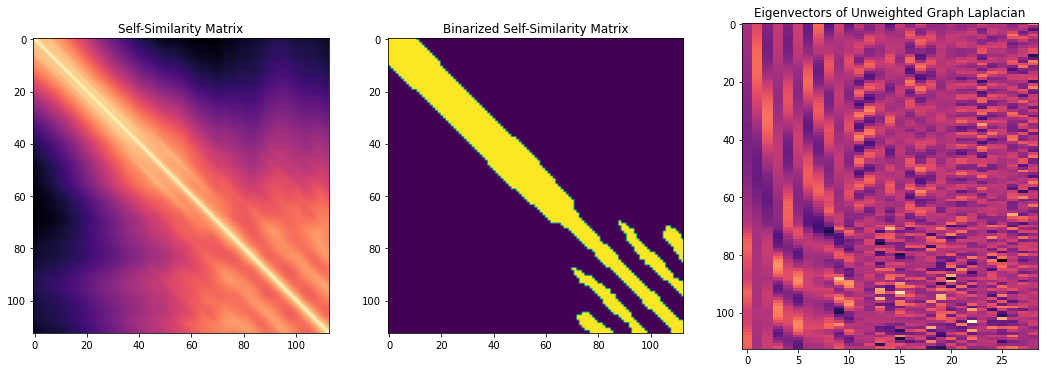

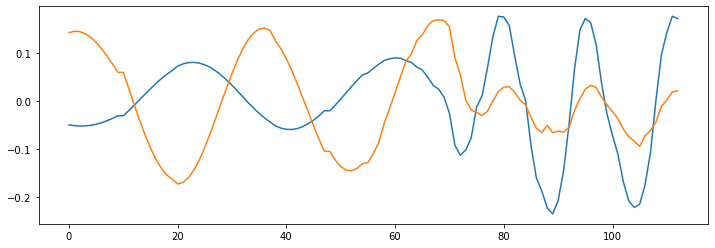

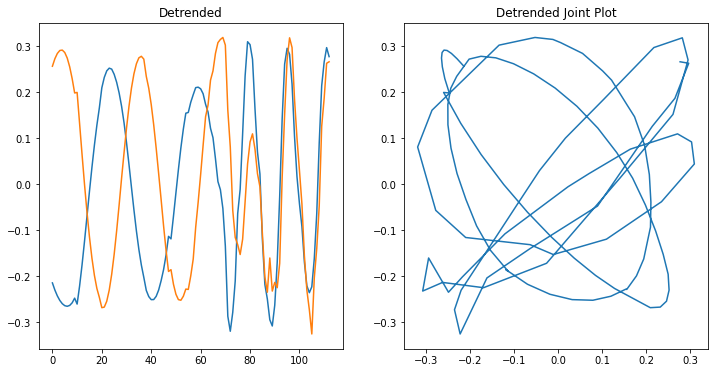

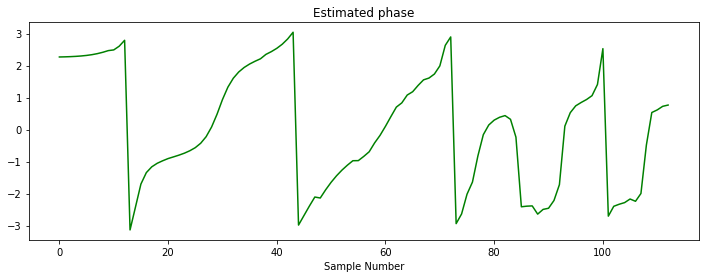

In [96]:
if __name__ == '__main__':
    
    D = get_csm(xyz, xyz)
    # Clean up the matrix a bit by doing a sliding window of length roughly the period
    period = 25
    D = sliding_window(D, period)
    # Clean up the matrix even more by binarizing it with nearest neighbors
    B = csm_to_binary_mutual(D, 20)
    #B = B[0:400, 0:400]
    v = getUnweightedLaplacianEigsDense(1-B)

    plt.figure(figsize=(18, 6))
    plt.subplot(131)
    plt.imshow(D, cmap='magma_r')
    plt.title("Self-Similarity Matrix")
    plt.subplot(132)
    plt.imshow(B)
    plt.title("Binarized Self-Similarity Matrix")
    plt.subplot(133)
    plt.imshow(v[:, 0:29], aspect='auto', cmap='magma_r', interpolation='none')
    plt.title("Eigenvectors of Unweighted Graph Laplacian")
    plt.show()


    # I can see the signal in the 5th and 6th eigenvectors
    # but it needs to be demodulated
    plt.figure(figsize=(12, 4))
    s = v[:, 5]
    c = v[:, 6]
    plt.plot(s)
    plt.plot(c)
    plt.show()

    from daps import *
    # Detrend with daps
    sf = detrend_timeseries(s, period)
    cf = detrend_timeseries(c, period)

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(sf)
    plt.plot(cf)
    plt.title("Detrended")
    plt.subplot(122)
    plt.title("Detrended Joint Plot")
    plt.plot(sf, cf)
    plt.show()

    # Extract the final phase and plot
    theta_phase = np.arctan2(cf, sf)
    plt.figure(figsize=(12, 4))
    plt.plot(theta_phase, color='green')
    plt.title("Estimated phase")
    plt.xlabel("Sample Number")
    plt.show()

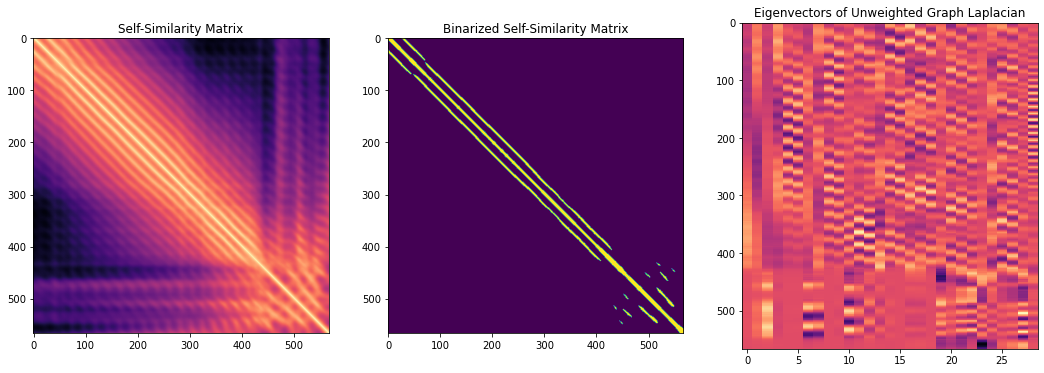

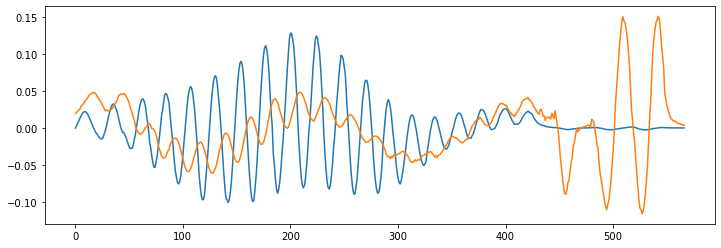

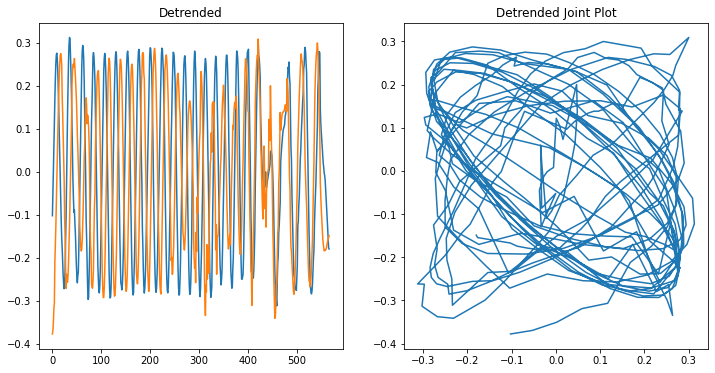

C:\Users\daven\AppData\Local\Temp\ipykernel_34964\842115922.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(start, end), theta[start:end], 'bo', color='red')
C:\Users\daven\AppData\Local\Temp\ipykernel_34964\842115922.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(start, end), theta[start:end], 'bo', color='green')


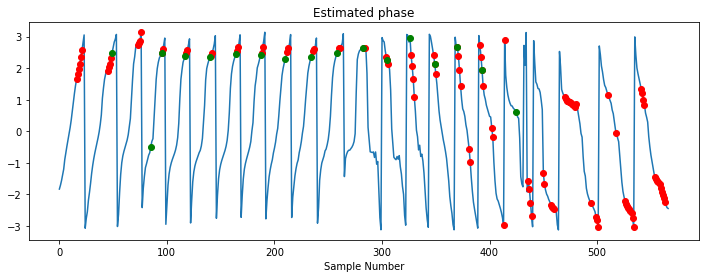

In [97]:
if __name__ == '__main__':
#     fin = open("csv/alpha_carbons.csv")
#     X = [[float(f) for f in line.split(",")] for line in fin.readlines()]
    X = np.array(Xa)
    D = get_csm(X, X)
    # Clean up the matrix a bit by doing a sliding window of length roughly the period
    period = 25
    D = sliding_window(D, period)
    # Clean up the matrix even more by binarizing it with nearest neighbors
    B = csm_to_binary_mutual(D, 20)
    #B = B[0:400, 0:400]
    v = getUnweightedLaplacianEigsDense(1-B)

    plt.figure(figsize=(18, 6))
    plt.subplot(131)
    plt.imshow(D, cmap='magma_r')
    plt.title("Self-Similarity Matrix")
    plt.subplot(132)
    plt.imshow(B)
    plt.title("Binarized Self-Similarity Matrix")
    plt.subplot(133)
    plt.imshow(v[:, 0:29], aspect='auto', cmap='magma_r', interpolation='none')
    plt.title("Eigenvectors of Unweighted Graph Laplacian")
    plt.show()


    # I can see the signal in the 5th and 6th eigenvectors
    # but it needs to be demodulated
    plt.figure(figsize=(12, 4))
    s = v[:, 5]
    c = v[:, 6]
    plt.plot(s)
    plt.plot(c)
    plt.show()

    from daps import *
    # Detrend with daps
    sf = detrend_timeseries(s, period)
    cf = detrend_timeseries(c, period)

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(sf)
    plt.plot(cf)
    plt.title("Detrended")
    plt.subplot(122)
    plt.title("Detrended Joint Plot")
    plt.plot(sf, cf)
    plt.show()


    # Extract the final phase and plot
    theta = np.arctan2(cf, sf)
    plt.figure(figsize=(12, 4))
    plt.plot(theta)
    plt.title("Estimated phase")
    plt.xlabel("Sample Number")

    for start, end in zip(startr, endr):
        if end < len(theta):
            plt.plot(range(start, end), theta[start:end], 'bo', color='red')
    for start, end in zip(startrpred, endrpred):
        if end < len(theta):
            plt.plot(range(start, end), theta[start:end], 'bo', color='green')

    plt.show()

In [80]:
startr

[16,
 45,
 73,
 95,
 118,
 141,
 165,
 188,
 212,
 236,
 260,
 283,
 304,
 327,
 348,
 370,
 381,
 391,
 402,
 413,
 436,
 450,
 457,
 470,
 494,
 499,
 510,
 518,
 526,
 541,
 554]

In [81]:
startrpred

[49,
 85,
 95,
 117,
 140,
 164,
 187,
 210,
 234,
 258,
 282,
 305,
 326,
 349,
 370,
 393,
 425]

In [130]:
f = open("pdb/AF-A0A1I9LP83-F1-model_v3.txt", "w")
f.write("attribute: phase\n")
f.write("recipient: residues\n")
for i in range(LRR_start):
    f.write("\t" + ":" + str(i+1) + "\t" + str(0) + "\n")
for i in range(len(theta)):
    f.write("\t" + ":" + str(i+LRR_start+1) + "\t" + str(theta[i]) + "\n")
f.close()

In [98]:
f = open("pdb/6909_T338-R1_position.txt", "w")
f.write("attribute: position\n")
f.write("recipient: residues\n")
for i in range(LRR_start):
    f.write("\t" + ":" + str(i+1) + "\t" + str(0) + "\n")
for i in range(len(theta)):
    f.write("\t" + ":" + str(i+LRR_start+1) + "\t" + str(int(i in startrpred)) + "\n")
f.close()

In [99]:
theta.shape

(567,)